# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе.

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


import kaleido
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import statsmodels.api as sm

import scipy.stats as stats

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

import re

import warnings

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

### Загрузка данных

In [2]:
# загрузка файла через его ID с собственного Gooogle disk (доступ Public)
# url = "https://drive.google.com/file/d/1aXc3Q5EgGfGGNq0DLYewLZSJbIvlLiN0/view?usp=sharing"
# ЗДЕСЬ ID 1aXc3Q5EgGfGGNq0DLYewLZSJbIvlLiN0 для загрузки
url = "https://drive.google.com/uc?export=download&id=1aXc3Q5EgGfGGNq0DLYewLZSJbIvlLiN0"
data = pd.read_csv(
    url,
    encoding="ISO-8859-1",
    dtype={'CustomerID': str,'InvoiceNo': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


### Статистический анализ данных

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


Выводы: в среднем каждую позицию заказывают в количестве 10 штук по средней цене 4.61. Данные сильно разбросаны (значение std), возможны выбросы.

**Проверка возможного выброса с количеством позиций - 80995**

In [4]:
mask = data['Quantity'].abs() == 80995.00
data[mask]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446,United Kingdom


Вывод: как видно клиент сначала заказал такое кол-во товара (возможно, ошибочно) затем через небольшое время сделал возврат.

**Проверка возможного выброса с отрицательной ценой товара**

In [5]:
mask = (data['UnitPrice'] < 0)
data[mask]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


Вывод: по всей видимости, эти строки с отрицательным значением цены относятся к техническому списанию безнадежных долгов. В дальнейшем для построения модели таких данных быть не должно.

In [6]:
data.describe(include = 'object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
CustomerID,406829,4372,17841,7983
Country,541909,38,United Kingdom,495478


Вывод:\
Количество заказов 25900, заказали 4070 различных товаров, сделали заказ 4372 клиента из 38 стран.\
*Вывод предварительный

**Построение гистограммы для просмотра данных о странах, из которых были сделаны заказы**

In [7]:
data_countries = data[['InvoiceNo', 'Country']].drop_duplicates()

In [8]:
data_countries = data_countries.drop('InvoiceNo', axis=1)
data_countries = data_countries.rename(columns = {'Country' : 'Страна'})

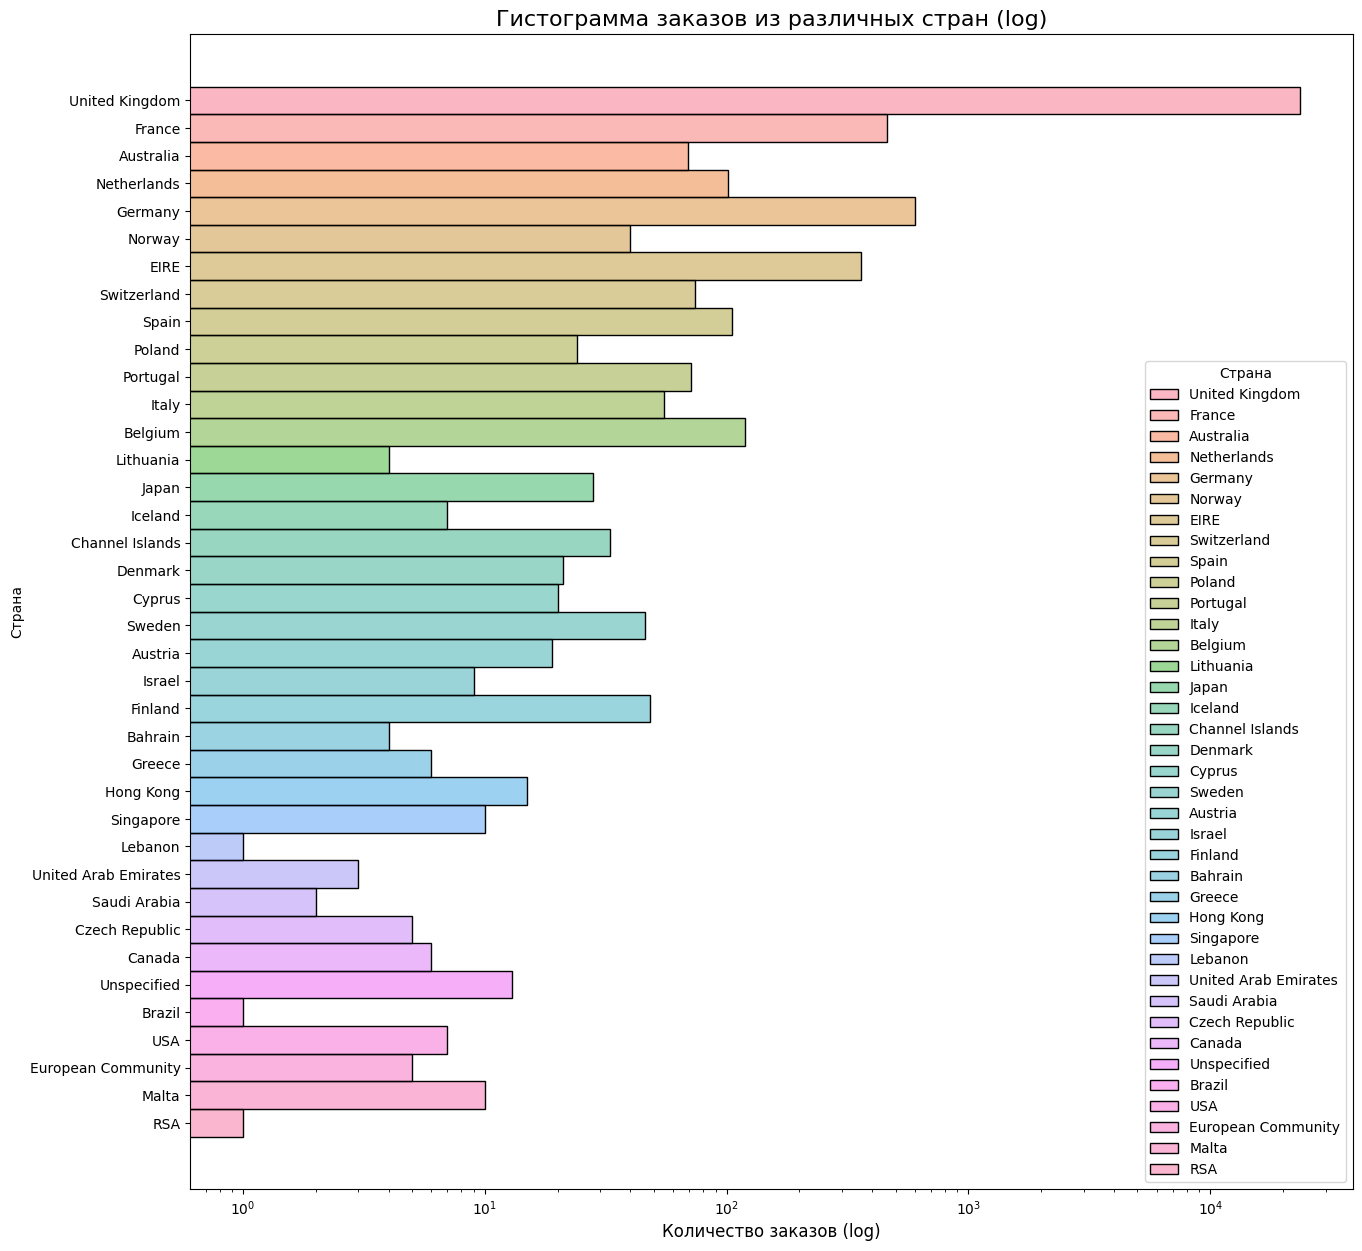

In [9]:
fig, axes = plt.subplots(1, figsize=(15, 15))

g = sns.histplot(
    data = data_countries,
    y = 'Страна',
    hue = 'Страна'
)

g.axes.set_xscale('log')
# Set label for y-axis
g.axes.set_xlabel( "Количество заказов (log)" , size = 12 )
# Set title for plot
g.axes.set_title( "Гистограмма заказов из различных стран (log)" , size = 16 )

plt.show()

Выводы: самое большое количество заказов из Англии (по месту нахождения торговой площадки). Также есть около 10 заказов с признаком страны Unspecified.

In [10]:
mask = data['Country'] == "Unspecified"
data[mask].groupby(by=['InvoiceNo']).count().shape[0]

13

### Изменение формата данных

In [11]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


### Обнаружение дубликатов в данных

In [12]:
mask = data.duplicated()
print(f'Число найденных полных дубликатов: {data[mask].shape[0]}')

Число найденных полных дубликатов: 5268


### Анализ пропусков в данных

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [14]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Пропуски есть у признаков **Description** и **CustomerID**.

## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [15]:
data.dropna(subset = 'CustomerID', inplace=True, axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [16]:
mask = data.duplicated()
print(f'Число найденных полных дубликатов (до удаления): {data[mask].shape[0]}')
data = data.drop_duplicates()
data.reset_index(drop=True, inplace=True)
data.shape[0]

Число найденных полных дубликатов (до удаления): 5225


401604

#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [17]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

Исхлдный алгоритм, предоставленный в п.2.1.3 не только неполный, но и неверный. При его анализе столкнулся с тем, что ряд котрольных точек не выполняется. Ниже приведён код для анализа. Затем на основании полученных данных для ясности картины были выбраны транзакции для клиента с ID **15311** и товара с  кодом **22778**.

In [18]:
negative_quantity = data[(data['Quantity'] < 0)].copy()
negative_quantity['Special'] = negative_quantity.groupby(by=['CustomerID', 'StockCode'])['Quantity'].transform('count')
mask = negative_quantity['Special'] > 1
negative_quantity[mask].sort_values(by=['Special', 'CustomerID', 'StockCode'], ascending = False )

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Special
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,35
6596,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527,United Kingdom,35
20799,C539003,D,Discount,-1,2010-12-15 12:35:00,26.93,14527,United Kingdom,35
24885,C539589,D,Discount,-1,2010-12-20 13:14:00,13.88,14527,United Kingdom,35
27551,C540171,D,Discount,-1,2011-01-05 12:26:00,22.97,14527,United Kingdom,35
...,...,...,...,...,...,...,...,...,...
397602,C581148,37449,CERAMIC CAKE STAND + HANGING CAKES,-1,2011-12-07 14:02:00,9.95,12462,Spain,2
60314,C544397,22063,CERAMIC BOWL WITH STRAWBERRY DESIGN,-1,2011-02-18 12:21:00,2.95,12462,Spain,2
397600,C581148,22063,CERAMIC BOWL WITH STRAWBERRY DESIGN,-1,2011-12-07 14:02:00,2.95,12462,Spain,2
214141,C563224,23298,SPOTTY BUNTING,-1,2011-08-14 14:33:00,4.95,12409,Switzerland,2


In [19]:
positive_quantity = data[(data['Quantity'] >= 0)].copy()
positive_quantity['Special'] = positive_quantity.groupby(by=['CustomerID', 'StockCode'])['Quantity'].transform('count')
mask = positive_quantity['Special'] > 1
positive_quantity[mask].sort_values(by=['Special', 'CustomerID', 'StockCode'], ascending = False )

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Special
1386,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911,EIRE,84
8389,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.00,14911,EIRE,84
8711,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.00,14911,EIRE,84
24255,539473,C2,CARRIAGE,1,2010-12-19 14:24:00,50.00,14911,EIRE,84
26236,539984,C2,CARRIAGE,1,2010-12-23 14:58:00,50.00,14911,EIRE,84
...,...,...,...,...,...,...,...,...,...
398121,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,2011-12-07 15:52:00,1.95,12347,Iceland,2
10434,537626,21064,BOOM BOX SPEAKER BOYS,6,2010-12-07 14:57:00,5.95,12347,Iceland,2
398116,581180,21064,BOOM BOX SPEAKER BOYS,24,2011-12-07 15:52:00,1.25,12347,Iceland,2
43954,542237,21041,RED RETROSPOT OVEN GLOVE DOUBLE,6,2011-01-26 14:30:00,2.95,12347,Iceland,2


In [20]:
mask = (negative_quantity['StockCode'] == '22778') & (negative_quantity['CustomerID'] == '15311')
negative_quantity[mask]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Special
18189,C538650,22778,GLASS CLOCHE SMALL,-1,2010-12-13 15:05:00,3.95,15311,United Kingdom,10
38467,C541573,22778,GLASS CLOCHE SMALL,-4,2011-01-19 12:47:00,3.39,15311,United Kingdom,10
42290,C542032,22778,GLASS CLOCHE SMALL,-7,2011-01-25 11:45:00,3.39,15311,United Kingdom,10
71618,C545650,22778,GLASS CLOCHE SMALL,-6,2011-03-04 13:14:00,3.39,15311,United Kingdom,10
136153,C553687,22778,GLASS CLOCHE SMALL,-2,2011-05-18 14:01:00,3.39,15311,United Kingdom,10
163936,C557224,22778,GLASS CLOCHE SMALL,-5,2011-06-17 13:22:00,3.39,15311,United Kingdom,10
173468,C558444,22778,GLASS CLOCHE SMALL,-1,2011-06-29 13:29:00,3.39,15311,United Kingdom,10
218062,C563655,22778,GLASS CLOCHE SMALL,-24,2011-08-18 10:44:00,3.39,15311,United Kingdom,10
282236,C570203,22778,GLASS CLOCHE SMALL,-1,2011-10-07 16:49:00,3.39,15311,United Kingdom,10
349742,C576561,22778,GLASS CLOCHE SMALL,-3,2011-11-15 13:22:00,3.39,15311,United Kingdom,10


In [21]:
mask = (positive_quantity['StockCode'] == '22778') & (positive_quantity['CustomerID'] == '15311')
positive_quantity[mask]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Special
138,536381,22778,GLASS CLOCHE SMALL,3,2010-12-01 09:41:00,3.95,15311,United Kingdom,10
6720,537195,22778,GLASS CLOCHE SMALL,2,2010-12-05 13:55:00,3.95,15311,United Kingdom,10
19847,538857,22778,GLASS CLOCHE SMALL,4,2010-12-14 13:58:00,3.95,15311,United Kingdom,10
37036,541293,22778,GLASS CLOCHE SMALL,24,2011-01-17 13:39:00,3.39,15311,United Kingdom,10
53484,543463,22778,GLASS CLOCHE SMALL,24,2011-02-08 14:06:00,3.39,15311,United Kingdom,10
102872,549542,22778,GLASS CLOCHE SMALL,48,2011-04-10 11:11:00,3.39,15311,United Kingdom,10
126905,552574,22778,GLASS CLOCHE SMALL,24,2011-05-10 12:20:00,3.39,15311,United Kingdom,10
153478,555855,22778,GLASS CLOCHE SMALL,24,2011-06-07 13:56:00,3.39,15311,United Kingdom,10
217977,563638,22778,GLASS CLOCHE SMALL,48,2011-08-18 10:36:00,3.39,15311,United Kingdom,10
343005,575919,22778,GLASS CLOCHE SMALL,32,2011-11-11 17:00:00,3.39,15311,United Kingdom,10


Далее неизменённый код к пункту 2.1.3

In [22]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов.
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) &
                       (data['InvoiceDate'] < col['InvoiceDate']) &
                       (data['Quantity'] > 0)].copy()
        # Транзакция-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0):
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого в столбец QuantityCanceled
        elif (df_test.shape[0] == 1):
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбце QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате
        elif (df_test.shape[0] > 1):
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']:
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

Вывод данных для клиента с ID **15311** и товара с  кодом **22778**.

In [23]:
mask = (data['StockCode'] == '22778') & (data['CustomerID'] == '15311')
data[mask]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
138,536381,22778,GLASS CLOCHE SMALL,3,2010-12-01 09:41:00,3.95,15311,United Kingdom,0.0
6720,537195,22778,GLASS CLOCHE SMALL,2,2010-12-05 13:55:00,3.95,15311,United Kingdom,1.0
18189,C538650,22778,GLASS CLOCHE SMALL,-1,2010-12-13 15:05:00,3.95,15311,United Kingdom,0.0
19847,538857,22778,GLASS CLOCHE SMALL,4,2010-12-14 13:58:00,3.95,15311,United Kingdom,0.0
37036,541293,22778,GLASS CLOCHE SMALL,24,2011-01-17 13:39:00,3.39,15311,United Kingdom,7.0
38467,C541573,22778,GLASS CLOCHE SMALL,-4,2011-01-19 12:47:00,3.39,15311,United Kingdom,0.0
42290,C542032,22778,GLASS CLOCHE SMALL,-7,2011-01-25 11:45:00,3.39,15311,United Kingdom,0.0
53484,543463,22778,GLASS CLOCHE SMALL,24,2011-02-08 14:06:00,3.39,15311,United Kingdom,6.0
71618,C545650,22778,GLASS CLOCHE SMALL,-6,2011-03-04 13:14:00,3.39,15311,United Kingdom,0.0
102872,549542,22778,GLASS CLOCHE SMALL,48,2011-04-10 11:11:00,3.39,15311,United Kingdom,0.0


Как видно из таблицы выше, когда стоят два возврата подряд, то исходный алгоритм учитывает только последний возврат. Например, стоят два возврата подряд -24шт от 2011.08.18 (время позже заказа от 2011.08.18) и -1шт от 2011.10.07. В результате для транзакции с заказом 48шт от 2011.08.18 исходным алгоритмом учтён только последний возврат -1шт. Аналогично для заказа 24 шт от 2011.01.07 учтён возрат -7шт от 2011.01.25, но не учтен возрат -4шт от 2011.01.19.

Реализовал алгоритм по принципу LIFO (сначала возврат последнего оформленного заказа)

In [24]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов.
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) &
                       (data['InvoiceDate'] < col['InvoiceDate']) &
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0):
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled
        elif (df_test.shape[0] == 1):
            index_order = df_test.index[0]
            # Так как, для данного условия, транзакция для кода товара и клиента может быть только одна, но возвратов может быть больше добавил +=
            # но такое добавление не должно превышать количество заказанных в транзакции штук,
            # что проверяется следующим условием
            if df_test.iloc[0]['Quantity'] >= ( quantity_canceled.loc[index_order] + (-col['Quantity']) ):
              quantity_canceled.loc[index_order] += -col['Quantity']

        # Транзакция-возврат имеет несколько контрагентов
        elif (df_test.shape[0] > 1):
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)
            lifo = -col['Quantity'] # переменная для учета штук к возврату
            for ind, val in df_test.iterrows(): # цикл по всем транзакциям, к которым может быть возврат
                quantity_canceled_delta = val['Quantity'] - quantity_canceled.loc[ind] # переменная учитывает, что к транзакции уже мог быть возврат
                # если вовзрат/остаток возврата больше количества, которое может быть учетно как возвращённое к транзакции,
                # то учитываем только то что может быть возвращено,
                # иначе учитываем возрат/остаток (lifo) и увеличиваем признак возврата на это кол-во
                quantity_canceled.loc[ind] += min( quantity_canceled_delta , lifo)
                lifo -= ( quantity_canceled_delta ) # уменьшаем возврат на учтенное кол-во
                # выход из цикла если учли весь возврат
                if lifo < 1:
                  break
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



Сначала проверка по нескольким контрольным точкам

In [25]:
sum(data['QuantityCanceled']<0)

0

In [26]:
data['QuantityCanceled'].sum()

248808.0

Проверка по данным, для которых исходный (предоставленный к проекту) алгоритм выполнялся неверно.

In [27]:
mask = (data['StockCode'] == '22778') & (data['CustomerID'] == '15311')
data[mask]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
138,536381,22778,GLASS CLOCHE SMALL,3,2010-12-01 09:41:00,3.95,15311,United Kingdom,0.0
6720,537195,22778,GLASS CLOCHE SMALL,2,2010-12-05 13:55:00,3.95,15311,United Kingdom,1.0
18189,C538650,22778,GLASS CLOCHE SMALL,-1,2010-12-13 15:05:00,3.95,15311,United Kingdom,0.0
19847,538857,22778,GLASS CLOCHE SMALL,4,2010-12-14 13:58:00,3.95,15311,United Kingdom,0.0
37036,541293,22778,GLASS CLOCHE SMALL,24,2011-01-17 13:39:00,3.39,15311,United Kingdom,11.0
38467,C541573,22778,GLASS CLOCHE SMALL,-4,2011-01-19 12:47:00,3.39,15311,United Kingdom,0.0
42290,C542032,22778,GLASS CLOCHE SMALL,-7,2011-01-25 11:45:00,3.39,15311,United Kingdom,0.0
53484,543463,22778,GLASS CLOCHE SMALL,24,2011-02-08 14:06:00,3.39,15311,United Kingdom,6.0
71618,C545650,22778,GLASS CLOCHE SMALL,-6,2011-03-04 13:14:00,3.39,15311,United Kingdom,0.0
102872,549542,22778,GLASS CLOCHE SMALL,48,2011-04-10 11:11:00,3.39,15311,United Kingdom,0.0


In [28]:
mask = data['QuantityCanceled'] > 0
data[mask]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100,United Kingdom,12.0
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,2.0
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688,United Kingdom,1.0
139,536381,22719,GUMBALL MONOCHROME COAT RACK,36,2010-12-01 09:41:00,1.06,15311,United Kingdom,3.0
211,536390,22941,CHRISTMAS LIGHTS 10 REINDEER,2,2010-12-01 10:19:00,8.50,17511,United Kingdom,1.0
...,...,...,...,...,...,...,...,...,...
397811,581166,23494,VINTAGE DOILY DELUXE SEWING KIT,1,2011-12-07 14:43:00,5.95,15525,United Kingdom,1.0
397840,581166,23079,TOADSTOOL BEDSIDE LIGHT,1,2011-12-07 14:43:00,8.95,15525,United Kingdom,1.0
398981,581325,16169E,WRAP 50'S CHRISTMAS,100,2011-12-08 11:53:00,0.42,15877,United Kingdom,100.0
398982,581325,22959,WRAP CHRISTMAS VILLAGE,25,2011-12-08 11:53:00,0.42,15877,United Kingdom,25.0


Ещё одна проверка

In [29]:
mask = (data['StockCode'] == '22959') & (data['CustomerID'] == '15877')
data[mask]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
398982,581325,22959,WRAP CHRISTMAS VILLAGE,25,2011-12-08 11:53:00,0.42,15877,United Kingdom,25.0
398999,C581330,22959,WRAP CHRISTMAS VILLAGE,-25,2011-12-08 11:57:00,0.42,15877,United Kingdom,0.0


Последняя контрольная точка

In [30]:
mask = (data['QuantityCanceled'] > data['Quantity']) & (data['QuantityCanceled'] > 0)
data[mask].shape[0]

0

Удаление отрицательных значений признака **Quantity**

In [31]:
mask = data['Quantity'] >= 0
print(f"Количество строк данных до удаления отрицательных значений признака <Quantity> {data.shape[0]}")
print(f"Количество строк с неотрицательными значениями признака <Quantity> {data[mask].shape[0]}")


Количество строк данных до удаления отрицательных значений признака <Quantity> 401604
Количество строк с неотрицательными значениями признака <Quantity> 392732


In [32]:
mask = data['Quantity'] < 0
df = data[~mask].copy()
print(f"Количество строк с неотрицательными значениями признака <Quantity> {df.shape[0]}")

Количество строк с неотрицательными значениями признака <Quantity> 392732


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [33]:
# Проверил какие транзакции с каким кодом товара и с каким описанием будем удалять
mask = df['StockCode'].str.contains(r"^[a-zA-Z]+")
dict_df = dict()
dict_df
for i, x in enumerate(df[mask]['StockCode'].unique()):
  dict_df[x] = df[mask]['Description'].unique()[i]

print(dict_df)

{'POST': 'POSTAGE', 'C2': 'CARRIAGE', 'M': 'Manual', 'BANK CHARGES': 'Bank Charges', 'PADS': 'PADS TO MATCH ALL CUSHIONS', 'DOT': 'DOTCOM POSTAGE'}


In [34]:
# берём данные без спец. символов
mask = df['StockCode'].str.contains(r"^[a-zA-Z]+")
df = df[~mask]

#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [35]:
mask = df['UnitPrice'] == 0
df = df[~mask]
# чуть обработал данные
df.reset_index(inplace=True, drop=True)
df['QuantityCanceled'] = df['QuantityCanceled'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391150 entries, 0 to 391149
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391150 non-null  object        
 1   StockCode         391150 non-null  object        
 2   Description       391150 non-null  object        
 3   Quantity          391150 non-null  int64         
 4   InvoiceDate       391150 non-null  datetime64[ns]
 5   UnitPrice         391150 non-null  float64       
 6   CustomerID        391150 non-null  object        
 7   Country           391150 non-null  object        
 8   QuantityCanceled  391150 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(5)
memory usage: 25.4+ MB


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:

 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [36]:
df['TotalPrice'] = df['UnitPrice'] * (df['Quantity'] - df['QuantityCanceled'])

Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


In [37]:
# в качестве дополнительного признака сделал
# признак характеризующий долю отказов к заказанной продукцтт
#df['RatioOrderCancel'] = round(df['QuantityCanceled'] / df['Quantity'], 4)

In [38]:
# ваш код здесь
# создание дополнительных признаков, производных от даты
# так как все транзакции, произошли в период с 01/12/2010 по 09/12/2011,
# то признака год делать не нужно
def add_datetime_features(df):
    df['Invoice_date'] = df['InvoiceDate'].dt.date
    df['Invoice_month'] = df['InvoiceDate'].dt.month_name()
    df['Invoice_hour'] = df['InvoiceDate'].dt.hour
    df['Invoice_day_of_week'] = df['InvoiceDate'].dt.day_name()
    return df

df = add_datetime_features(df)
# признак InvoiceDate будет лишним, но оставил для RFM анализа
#df.drop('InvoiceDate', axis=1, inplace=True)

In [39]:
mask = df['QuantityCanceled'] > 0
df[mask].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,Invoice_date,Invoice_month,Invoice_hour,Invoice_day_of_week
64,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100,United Kingdom,12,219.00,2010-12-01,December,9,Wednesday
95,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,2,49.56,2010-12-01,December,9,Wednesday
97,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688,United Kingdom,1,12.65,2010-12-01,December,9,Wednesday
138,536381,22719,GUMBALL MONOCHROME COAT RACK,36,2010-12-01 09:41:00,1.06,15311,United Kingdom,3,34.98,2010-12-01,December,9,Wednesday
208,536390,22941,CHRISTMAS LIGHTS 10 REINDEER,2,2010-12-01 10:19:00,8.50,17511,United Kingdom,1,8.50,2010-12-01,December,10,Wednesday
209,536390,22960,JAM MAKING SET WITH JARS,12,2010-12-01 10:19:00,3.75,17511,United Kingdom,1,41.25,2010-12-01,December,10,Wednesday
218,536390,22197,SMALL POPCORN HOLDER,100,2010-12-01 10:19:00,0.72,17511,United Kingdom,1,71.28,2010-12-01,December,10,Wednesday
219,536390,22198,LARGE POPCORN HOLDER,50,2010-12-01 10:19:00,1.45,17511,United Kingdom,3,68.15,2010-12-01,December,10,Wednesday
225,536390,22654,DELUXE SEWING KIT,40,2010-12-01 10:19:00,4.95,17511,United Kingdom,1,193.05,2010-12-01,December,10,Wednesday
231,536390,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 10:19:00,1.65,17511,United Kingdom,1,163.35,2010-12-01,December,10,Wednesday


### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)?

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



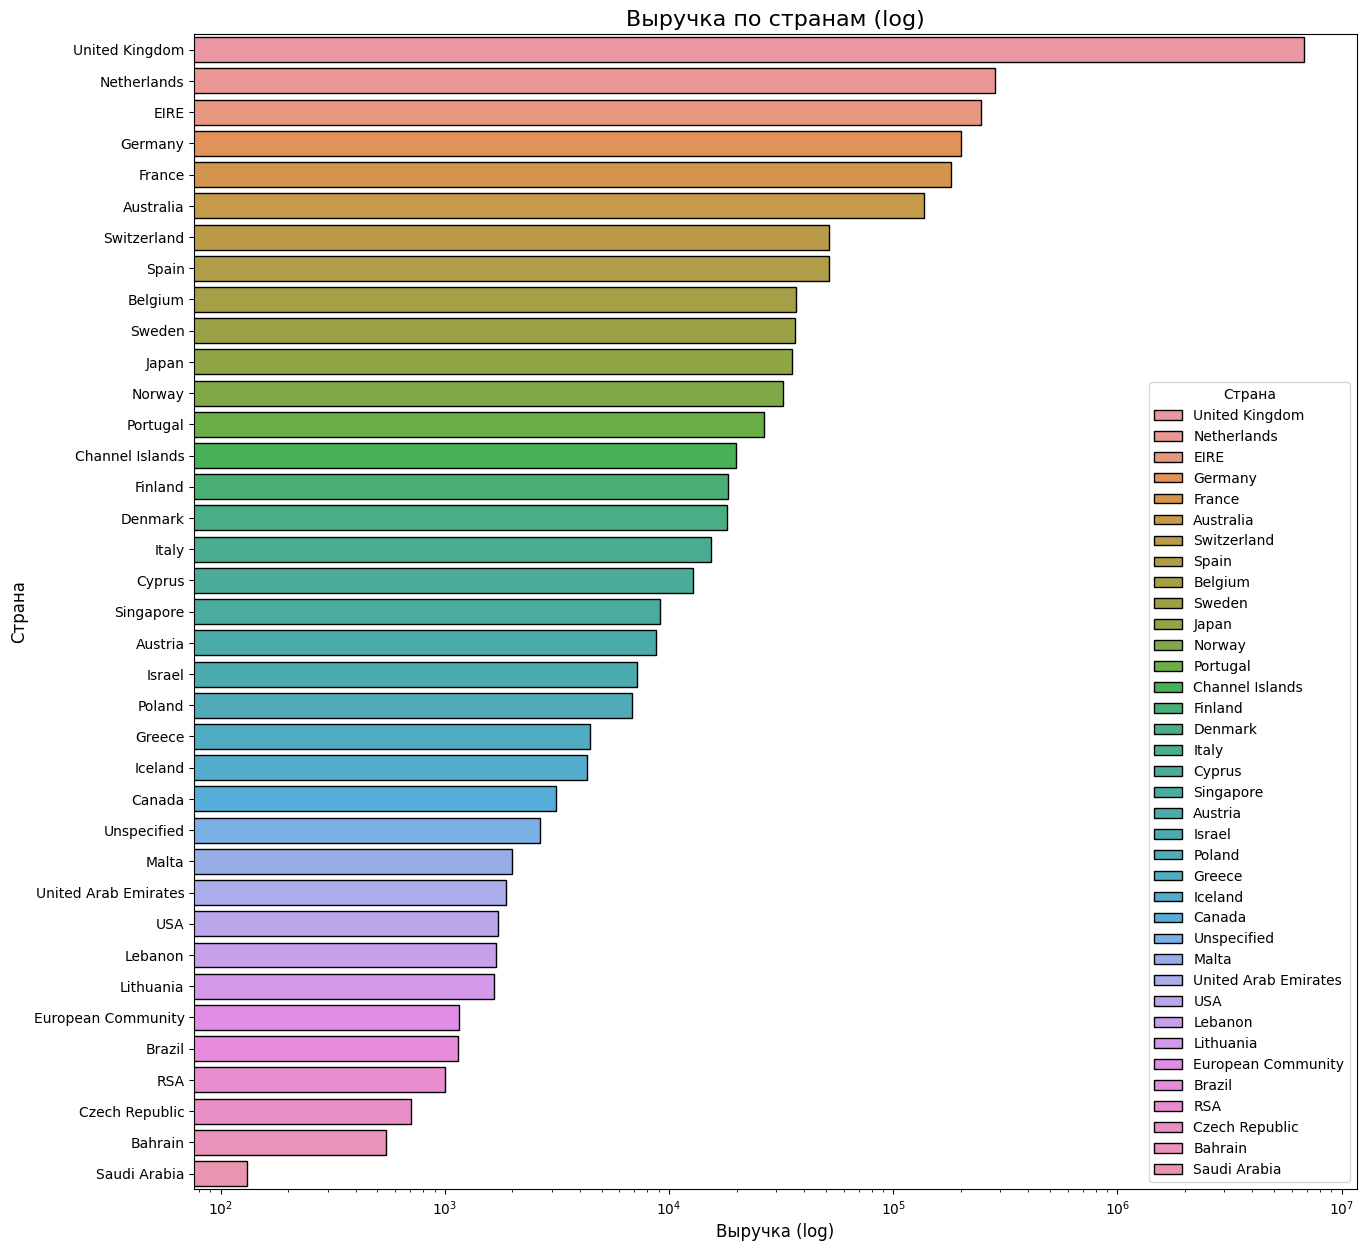

In [40]:
graph_data = df.groupby(by=['Country'], as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False)
graph_data = graph_data.rename(columns = {'Country' : 'Страна', 'TotalPrice' : 'Выручка'}).reset_index(drop=True)

fig, axes = plt.subplots(1, figsize=(15, 15))

g = sns.barplot(
    data = graph_data,
    x = 'Выручка',
    y = 'Страна',
    hue = 'Страна',
    dodge=False
)

g.axes.set_xscale('log')
# Set label for y-axis
g.axes.set_xlabel( "Выручка (log)" , size = 12 )
g.axes.set_ylabel( "Страна" , size = 12 )
# Set title for plot
g.axes.set_title( "Выручка по странам (log)" , size = 16 )

plt.show()


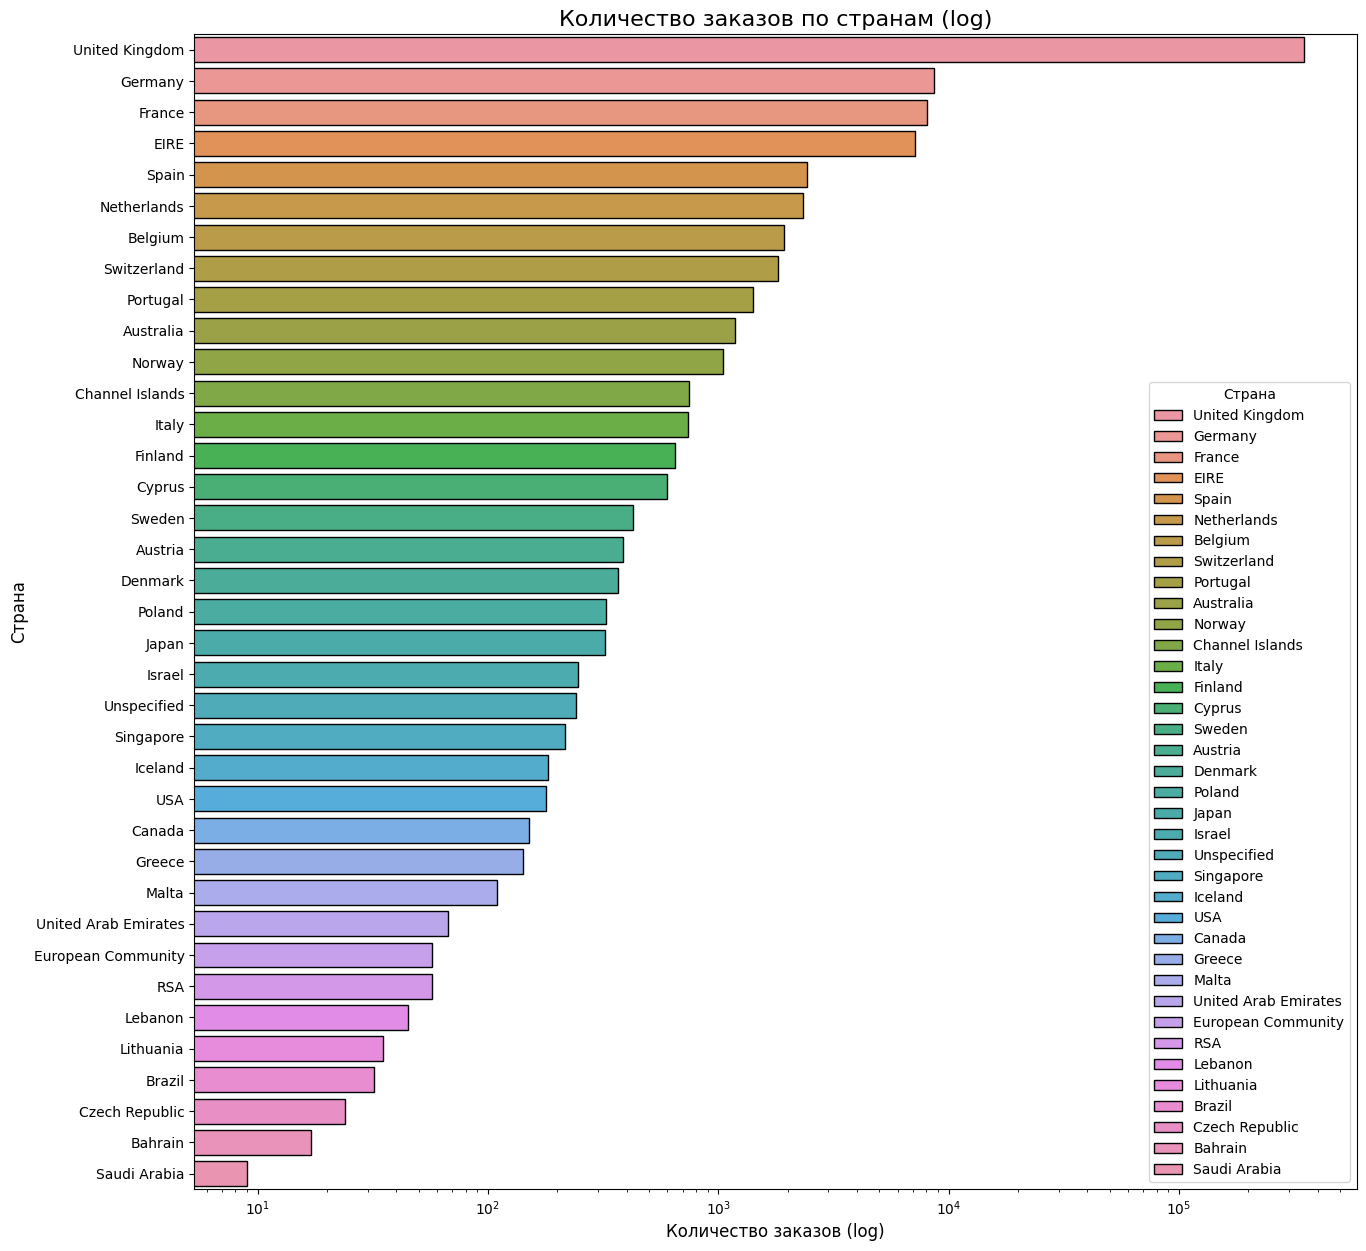

In [41]:
graph_data = df.groupby(by=['Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
graph_data = graph_data.rename(columns = {'Country' : 'Страна', 'InvoiceNo' : 'Количество заказов'}).reset_index(drop=True)

fig, axes = plt.subplots(1, figsize=(15, 15))

g = sns.barplot(
    data = graph_data,
    x = 'Количество заказов',
    y = 'Страна',
    hue = 'Страна',
    dodge=False
)

g.axes.set_xscale('log')
# Set label for y-axis
g.axes.set_xlabel( "Количество заказов (log)" , size = 12 )
g.axes.set_ylabel( "Страна" , size = 12 )
# Set title for plot
g.axes.set_title( "Количество заказов по странам (log)" , size = 16 )

plt.show()

In [42]:
# Для анализа сезонности продаж:
# 1. сгруппировал данные по месяцу, стране
# 2. вывел общую месячную выручку
# 3. вывел долю выручки страны в общей месячной выручке
# 4. сделал отдельную таблицу с тремя сранами, которые внесли натбольший вклад в общую долю

graph_data = df.groupby(by=['Invoice_month', 'Country'], as_index=False)['TotalPrice'].sum()

graph_data['Month_TotalPrice'] = graph_data.groupby(by=['Invoice_month'])['TotalPrice'].transform('sum')

graph_data['CountryRatio'] = graph_data['TotalPrice'] / graph_data['Month_TotalPrice']
graph_data = graph_data.sort_values(by=['Invoice_month', 'CountryRatio'], ascending=False)
monthes = graph_data['Invoice_month'].unique()
graph_all = graph_data[graph_data['Invoice_month'] == monthes[0]].head(3)
for month in monthes[1:]:
  mask = graph_data['Invoice_month'] == month
  df_month = graph_data[mask].head(3)
  graph_all = pd.concat((graph_all, df_month), axis = 0)

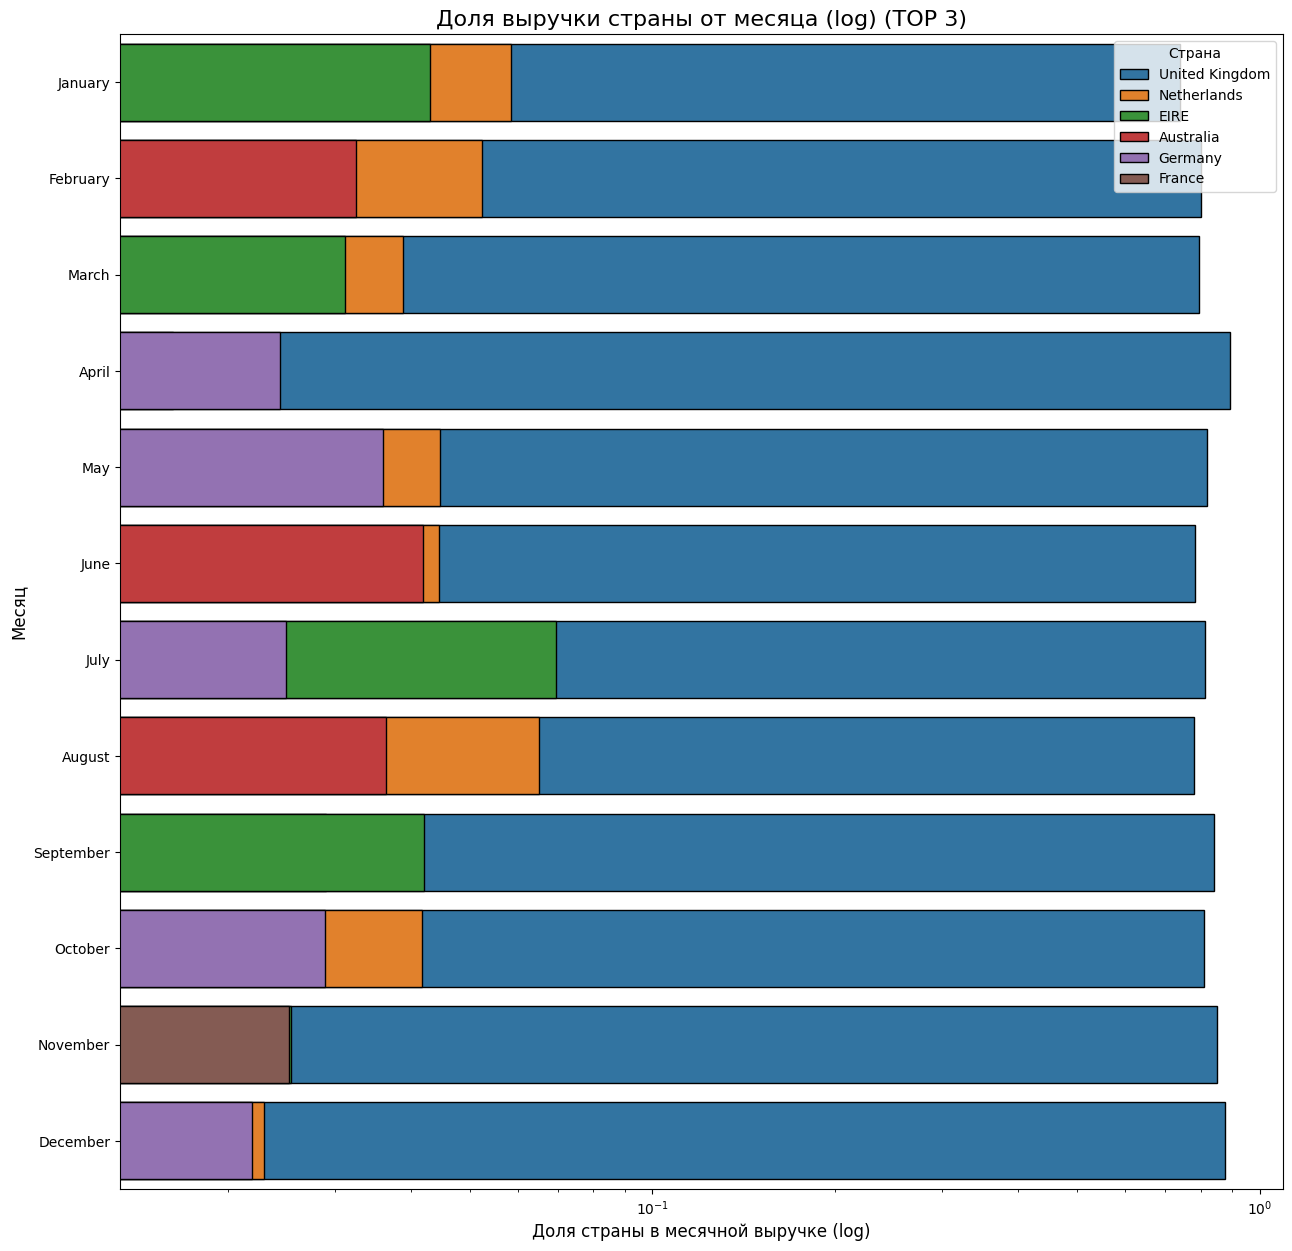

In [43]:
month_dict = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
graph_all['month_index'] = graph_all['Invoice_month'].map(month_dict)
graph_all = graph_all.sort_values(by=['month_index', 'CountryRatio'], ascending = [True, False]).reset_index(drop=True)

graph_all = graph_all.rename(columns = {'CountryRatio' : 'Доля страны в месячной выручке', 'Country' : 'Страна', 'Invoice_month' : 'Месяц'}).reset_index(drop=True)

fig, axes = plt.subplots(1, figsize=(15, 15))

g = sns.barplot(
    data = graph_all,
    y = 'Месяц',
    x = 'Доля страны в месячной выручке',
    hue = 'Страна',
    dodge=False
)

g.axes.set_xscale('log')
# Set label for y-axis
g.axes.set_ylabel( "Месяц" , size = 12 )
g.axes.set_xlabel( "Доля страны в месячной выручке (log)" , size = 12 )
# Set title for plot
g.axes.set_title( "Доля выручки страны от месяца (log) (TOP 3)" , size = 16 )

plt.show()

Значительную долю в заказах и выручке имеет Англия, как страна где и находится магазин.

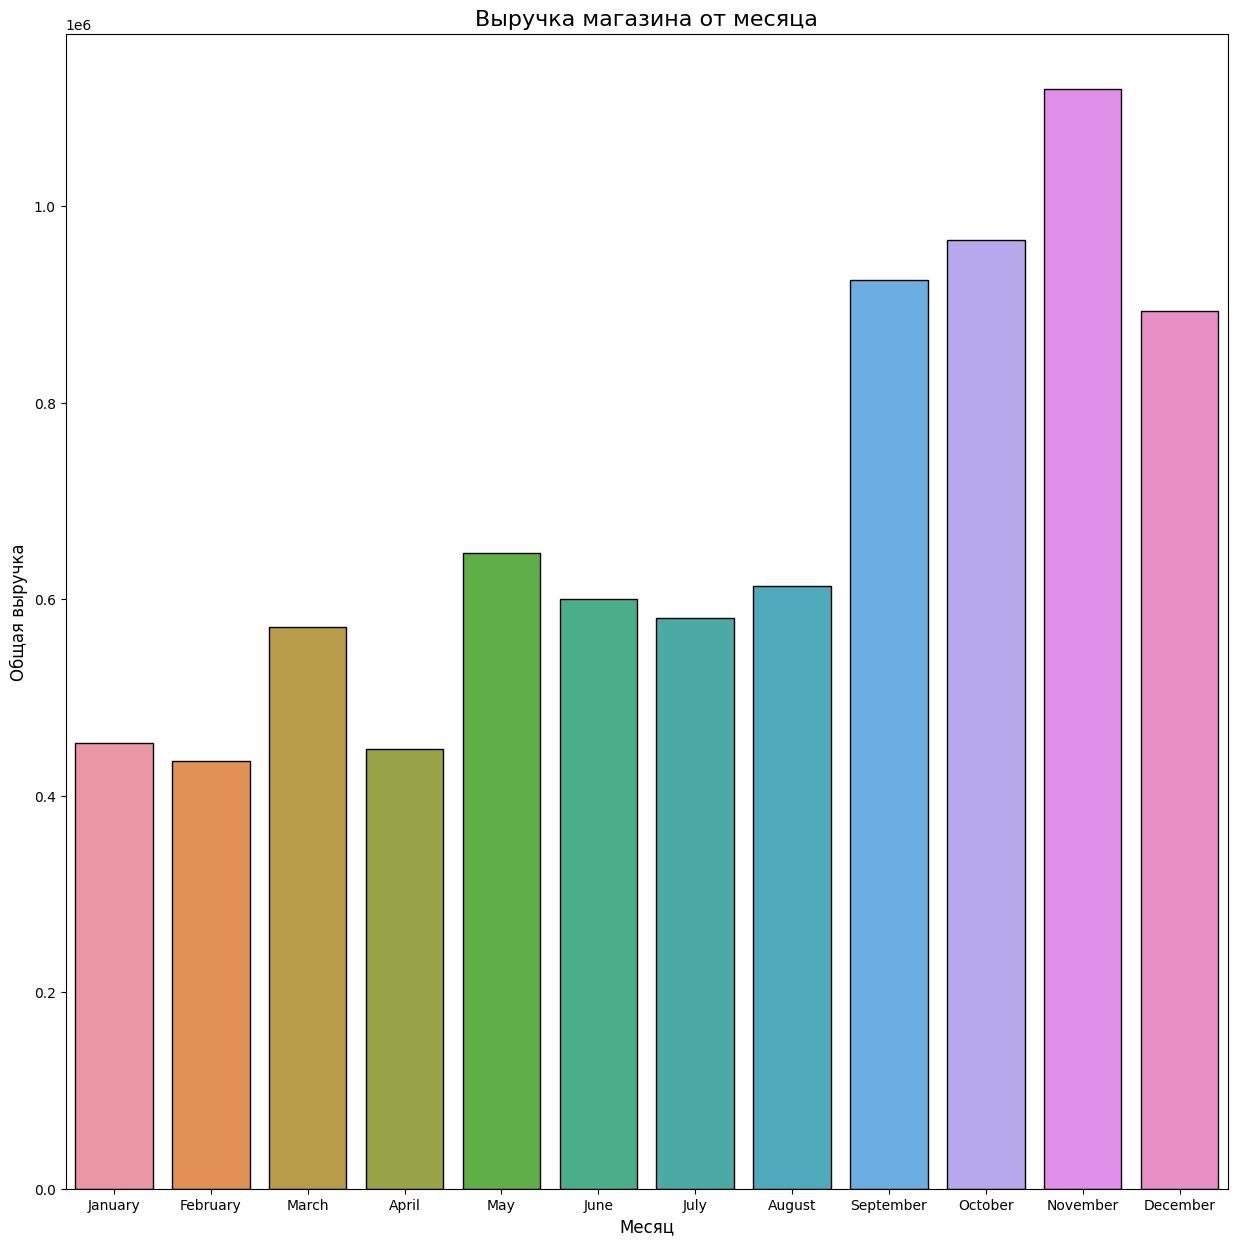

In [44]:
graph_data = df.groupby(by=['Invoice_month'], as_index=False)['TotalPrice'].sum()

graph_data = graph_data.rename(columns = {'TotalPrice' : 'Выручка', 'Invoice_month' : 'Месяц'}).reset_index(drop=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, axes = plt.subplots(1, figsize=(15, 15))

g = sns.barplot(
    data = graph_data,
    x = 'Месяц',
    y = 'Выручка',
    order = month_order,
    dodge=False
)

# Set label for y-axis
g.axes.set_xlabel( "Месяц" , size = 12 )
g.axes.set_ylabel( "Общая выручка" , size = 12 )
# Set title for plot
g.axes.set_title( "Выручка магазина от месяца" , size = 16 )

plt.show()




Из графика видно, что значительное увеличение количества заказов с сентября до конца года. Можно, конечно, связать это с рождественским и новогодним сезоном подарков, но так как, по сути, год всего один, то сложно говорить о сезонных тенденциях.

,Час заказа,Среднее количество заказов
0,6,1.0
1,7,16.0
2,8,42.0
3,9,86.0
4,10,124.0
5,11,159.0
6,12,232.0
7,13,208.0
8,14,176.0
9,15,148.0


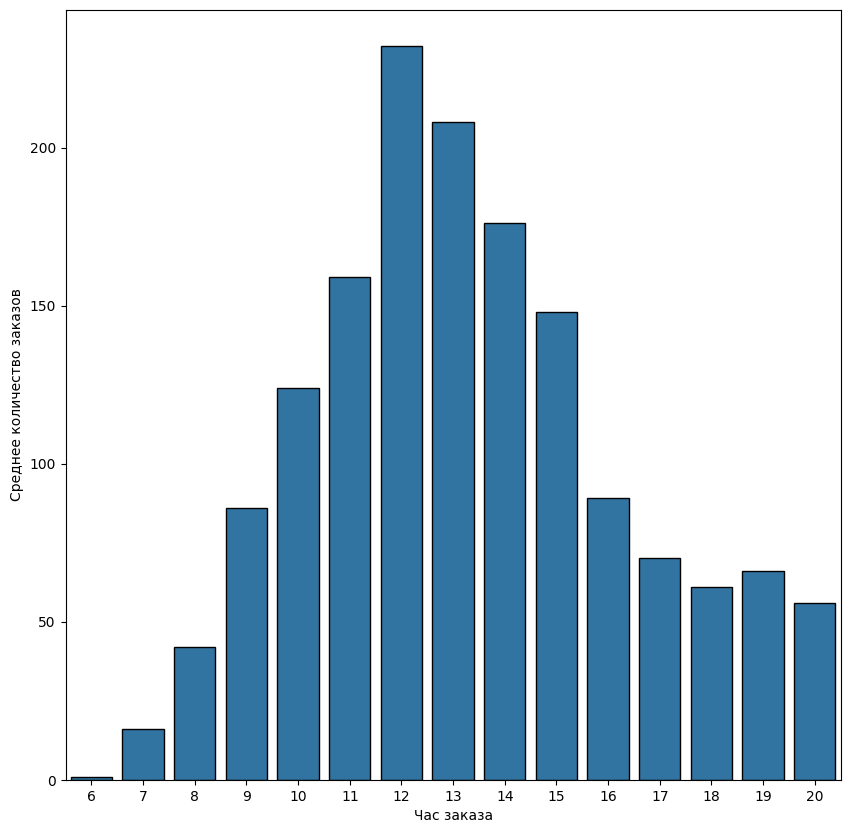

In [45]:
df_date_hour = df.groupby(by=['Invoice_date', 'Invoice_hour'], as_index=False)['InvoiceNo'].count()
graph_data = df_date_hour.groupby('Invoice_hour', as_index=False)['InvoiceNo'].mean().round()
graph_data = graph_data.rename(columns = {'Invoice_hour' : 'Час заказа', 'InvoiceNo' : 'Среднее количество заказов'}).reset_index(drop=True)

display(graph_data)

fig, axes = plt.subplots(1, figsize=(10, 10))


g = sns.barplot(
    data=graph_data,
    x='Час заказа',
    y='Среднее количество заказов',
       color='C10'
    )

Далее определение характера распределения среднего количества заказов в зависимости от времени суток.

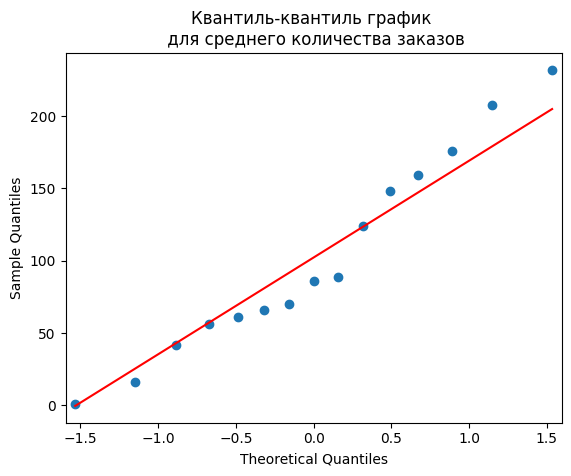

In [46]:
# задаём параметры квантиль-квантиль графика
sm.qqplot(graph_data['Среднее количество заказов'], line='s')
plt.title('Квантиль-квантиль график \n для среднего количества заказов')

# отображаем квантиль-квантиль график
plt.show()

In [47]:
# задаём уровень значимости
alpha = 0.05

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(graph_data['Среднее количество заказов'])

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.557
Распределение нормальное


### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM.

<img src="//lms-cdn.skillfactory.ru/assets/courseware/v1/e44087873a88167cdc50208b74979f8b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_PJ_6_2_5.png" style="width: 500px;">

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов.

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
  $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [48]:
# получение даты от которой будет отсчитываться давность последнего заказа клиента
# группировка по клиентам и создание признаков RFM,
# с дальнейшим переименованием столбцов
lastdate = df['InvoiceDate'].max()
enddate = pd.to_datetime(lastdate) + pd.DateOffset(days=1, normalize=True)
rfm_table = df.groupby(by='CustomerID', as_index=False)
rfm_table = rfm_table.agg({'InvoiceDate' : "max", 'InvoiceNo' : "nunique", 'TotalPrice' : "sum"})
rfm_table['InvoiceDate'] = (enddate - rfm_table['InvoiceDate']).dt.days
rfm_table = rfm_table.rename(columns = {'InvoiceDate' : 'Recency', 'InvoiceNo' : 'Frequency', 'TotalPrice' : 'Monetary'})
display(rfm_table.head(5))


,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,0.00
1,12347,2,7,4310.00
2,12348,75,4,1437.24
3,12349,18,1,1457.55
4,12350,310,1,294.40


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [49]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)


# Так как я rfm_table сохранил как DataFrame, то первый/нулевой столбец "CustomerID", его для
# коробчатой даиграммы использовать не надо
for i in range(1, len(boxes)):
  fig.add_trace(boxes[i]['data'][0], row=1, col=i)


fig.update_layout(showlegend=True)
fig.show()  #fig.show(renderer="svg")
fig.write_html("plotly/boxplot_rfm.html")

Для просмотра интерактивного графика перейдите, пожалуйста, по ссылке  [**ГРАФИКИ пункт 2.3**](https://htmlpreview.github.io/?https://github.com/Cherant1976/SF_Customer_Segmentation_Project/blob/master/plotly/boxplot_rfm.html)

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [50]:
# преобразование данных с учетом верхней границы квантиля
mask = (rfm_table.Frequency <= np.percentile(rfm_table.Frequency,95)) & (rfm_table.Monetary <= np.percentile(rfm_table.Monetary,95))
rfm_table = rfm_table[mask]

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга).

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [51]:
# создание данных для обработки )) (просто удаление неинформативного для клатеризации столбца с ID клиентов)
X = rfm_table.drop(['CustomerID'], axis=1)

In [52]:
# обработка с помощью pipeline входных данных
# стандартизация и снижение размерности до 2-х признаков
pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2))])
X_scaled_2d = pipeline.fit_transform(X)
df_X = pd.DataFrame(X_scaled_2d)
df_X.head(5)


,0,1
0,-2.135166,1.401550
1,3.447345,0.853237
2,0.629251,0.083343
3,0.153117,-0.720813
4,-1.888719,1.382625


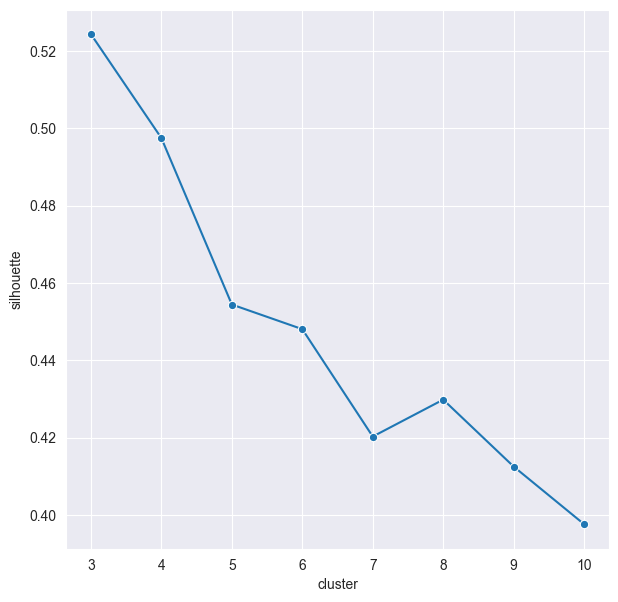

In [53]:
# функция для создания графиков зависимости
# коэффициентов профиля от количества кластеров
def silhouette_graph():
  # создадим пустой словарь, ключами будут инерция и количество кластеров
  silhouette_res = {"silhouette": [], "cluster": []}

  for cluster_num in range(3, 10 + 1):
      silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_scaled_2d))
      silhouette_res["cluster"].append(cluster_num)

  # сохраним в датафрейм значение силуэта и количество кластеров
  silhouette_df = pd.DataFrame(silhouette_res)

  fig = plt.figure(figsize=(7,7))
  # установим стиль для визуализиции
  sns.set_style("darkgrid")
  # визуализируем зависимость значения инерции от количества кластеров
  sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o");

# использование алгоритма k-средних
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

silhouette_graph()

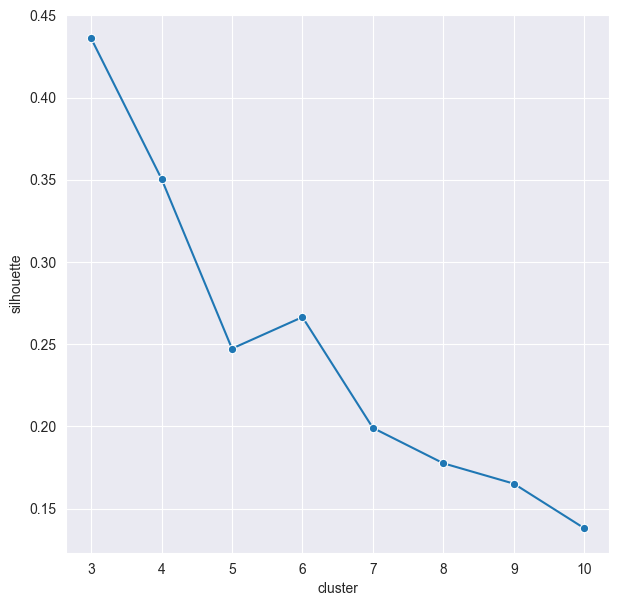

In [54]:
# использование модели гауссовой смеси
def get_silhouette(cluster_num, X):
  gm_clustering = GaussianMixture(n_components=cluster_num, random_state=42)
  # обучаем модель
  gm_clustering.fit(X)
  # для матрицы X получаем предсказания к какому кластеру принадлежат объекты
  silhouette = silhouette_score(X, gm_clustering.predict(X))
  return silhouette

silhouette_graph()

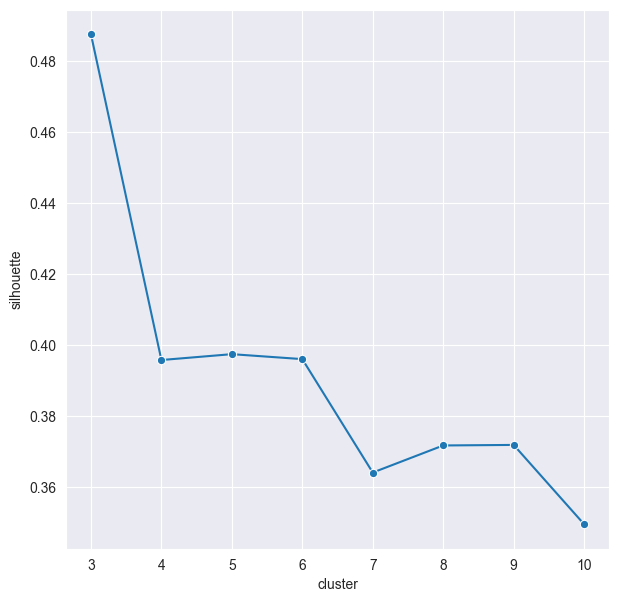

In [55]:
# использование модели агломеративной иерархической кластеризации
def get_silhouette(cluster_num, X):
    aggl = AgglomerativeClustering(n_clusters=cluster_num)
  # подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, aggl.fit_predict(X))
    return silhouette

silhouette_graph()

In [56]:
# Так как метрика профиля показала наибольшее значение для 3-х кластеров
# метода k-means, то использовал его для создания прогнозного признака кластера/группы,
# к которым относятся клиенты
k_means =  KMeans(n_clusters=3, random_state=42)
k_means.fit(X_scaled_2d)
rfm_table['Clusters'] = k_means.labels_

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

In [57]:
# В данном случае для 3d визуализации удобней интерактивная диаграмма
fig = px.scatter_3d(
    data_frame=rfm_table,
    x = 'Recency',
    y = 'Frequency',
    z = 'Monetary',
    color='Clusters',

    width=1000,
    height=700
)

fig.show()
fig.write_html("plotly/scatter_3d_rfm.html")

Для просмотра интерактивного графика перейдите, пожалуйста, по ссылке [**ГРАФИКИ пункт 3.2.1**](https://htmlpreview.github.io/?https://github.com/Cherant1976/SF_Customer_Segmentation_Project/blob/master/plotly/scatter_3d_rfm.html)

Полученные кластеры опередляются следующими характеристиками:
+ 1. В первый кластер попали клиенты с большой давностью последнего заказа, с небольшой частотой заказов и небольшой суммой заказов. Почти упущенные клиенты.
+ 2. Во второй кластер попали клиенты с небольшой давностью последнего заказа, с чуть большей частотой заказов, чем клиенты первого кластера и небольшой суммой заказов. Клиенты, которые могут перейти как в первую, так и третью группу. Клиенты, которым нужно уделить внимание.
+ 3. В третий кластер попали клиенты  с маленькой давностью последнего заказа, с большой частотой заказов и большой суммой заказов. Это лояльные клиенты, чью лояльность нужно поддерживать.

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник.

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [58]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()
    fig.write_html("plotly/cluster_profile_rfm.html")

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [59]:
# Группировка по кластерам и получение средних значенией признаков для
# полученной группировки
rfm_group = rfm_table.drop('CustomerID', axis=1).groupby(by='Clusters')
rfm_group = rfm_group.agg({'Recency' : "mean", 'Frequency' : "mean", 'Monetary' : "mean"})
plot_cluster_profile(rfm_group, rfm_group.shape[0])

Для просмотра интерактивного графика перейдите, пожалуйста, по ссылке [**ГРАФИКИ пункт 3.2.2**](https://htmlpreview.github.io/?https://github.com/Cherant1976/SF_Customer_Segmentation_Project/blob/master/plotly/cluster_profile_rfm.html)

Выводы **Radar chart** подтверждают выводы сделанные ранее.

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

Заключение:
+ На основании анализа продаж, можно отметить значительную долю заказов из Англии, Европы, Австралии. Заказы поступают из разных стран и возможно нужно нацелиться на международные рынки.
+ Очевидно должен присутствовать сезонный спрос на подарки (рожденственский период), но данных по годам практтически нет, поэтому наверняка сказать о сезонности нельзя.
+ Даже по-часовой анализ заказов говорит об основной массе заказов из Англии. Так как мало заказов в ранние и поздние часы, если бы было много заказов из других часовых поясов, то почасовое распределение заказов было бы более однородным.

+ Выводы по кластеризации:\
    Полученные кластеры опередляются следующими характеристиками:
 1. В первый кластер попали клиенты с большой давностью последнего заказа, с небольшой частотой заказов и небольшой суммой заказов. Почти упущенные клиенты.
 2. Во второй кластер попали клиенты с небольшой давностью последнего заказа, с чуть большей частотой заказов, чем клиенты первого кластера и небольшой суммой заказов. Клиенты, которые могут перейти как в первую, так и третью группу. Клиенты, которым нужно уделить внимание.
 3. В третий кластер попали клиенты  с маленькой давностью последнего заказа, с большой частотой заказов и большой суммой заказов. Это лояльные клиенты, чью лояльность нужно поддерживать.
 
* исправлен предоставленный к проекту алгоритм.
